In [1]:
import numpy  as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
from database import Database
from datetime import datetime, timedelta
db = Database()

%matplotlib inline
%reload_ext autoreload
%autoreload 2

In [2]:


start_date = '2021-09-01'
end_date = '2021-09-30'
from_date_str = start_date + "T00:00:00+00:00"
to_date_str = end_date + "T23:59:59+00:00"
from_date = datetime.strptime(from_date_str, '%Y-%m-%dT%H:%M:%S%z')
to_date = datetime.strptime(to_date_str, '%Y-%m-%dT%H:%M:%S%z')

data = db.get_all_data('Dagg_passenger_rating', {'date': {'$gte': from_date, '$lt': to_date}},
                       {'_id': 0})
entries = list(data)
df = pd.DataFrame(entries)

In [3]:
#df.head()
#df.info()
#df.describe()

df['date']=df['date'].dt.date
gp = df.groupby('date').mean()
gp.reset_index()

,date,avg
0,2021-09-01,3.066667
1,2021-09-02,3.163580
2,2021-09-03,3.208333
3,2021-09-04,3.531481
4,2021-09-05,2.851852
5,2021-09-06,2.981481
6,2021-09-07,2.811404
7,2021-09-08,3.111111
8,2021-09-09,3.238426
9,2021-09-10,3.191667


<AxesSubplot:title={'center':'Daily Service Rating Graph'}, xlabel='date', ylabel='ratings'>

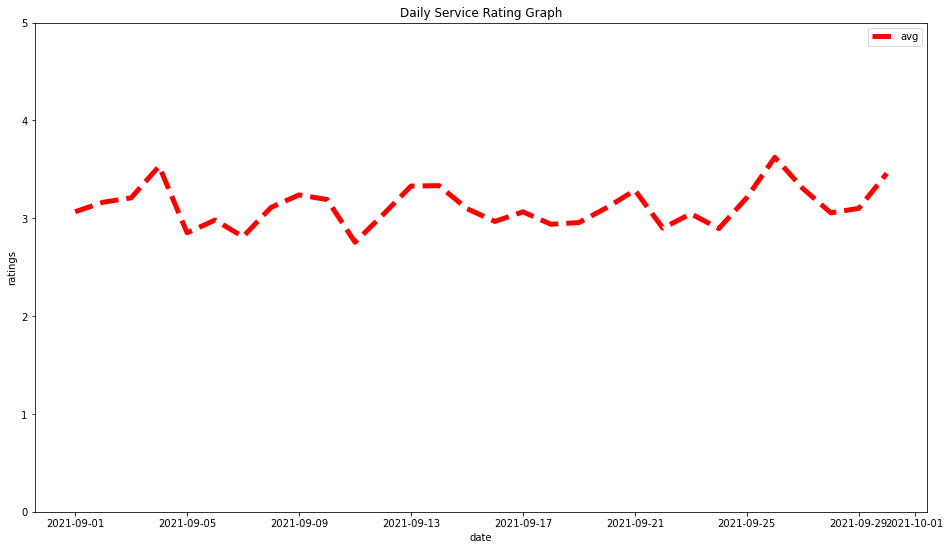

In [4]:
fig, axes = plt.subplots(1,1,figsize=(16,9))

axes.set_ylabel('ratings')
axes.set_ylim([0,5])
axes.set_xlabel('date')
axes.set_title('Daily Service Rating Graph')

gp.plot(ax=axes,style='r--',lw=5)